# Pymaceuticals Inc.
---

### Analysis

- Based on the Summary Statistics dataframe, it is clear that Capomulin and Ramicane are the most effective drugs. The two drugs resulted in the lowest averages, as well as a lower variance/standard deviation which indicated its effectiveness in reducing tumors as well as consistancy of its effectivness.
 

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_mouse_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [159]:
# Checking the number of mice.
totalMice = combined_mouse_data_df["Mouse ID"].value_counts()
print(len(totalMice))

249


In [161]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Uses duplicate function to look through Mouse ID column and Timepoint column and return a list of duplicated mouse IDs
dupeMiceId = combined_mouse_data_df.loc[combined_mouse_data_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupeMiceId[0]

'g989'

In [163]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeMiceData = combined_mouse_data_df.loc[combined_mouse_data_df["Mouse ID"] == dupeMiceId[0]]
dupeMiceData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [165]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#use loc command to find everywhere where mouse id does not equal g989 (.isin)
# .isin will take a list of duplicate mouse IDs and uses DF to filter out everything where duplicate mouse ID is contained
clean_combined_mouse_data_df = combined_mouse_data_df[combined_mouse_data_df["Mouse ID"].isin(dupeMiceId) == False]
clean_combined_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [167]:
# Checking the number of mice in the clean DataFrame.
#take length of list of unique id's
len(clean_combined_mouse_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#tumorCount = clean_combined_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
tumorMean = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumorMed = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumorVar = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumorSTD = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumorSEM = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].apply(lambda x: st.sem(x, nan_policy='omit'))


summaryStatsDF = pd.DataFrame({
    "Mean Tumor Volume": tumorMean,
    "Median Tumor Volume": tumorMed,
    "Tumor Volume Variance":tumorVar ,	
    "Tumor Volume Std. Dev.":tumorSTD,
    "Tumor Volume Std. Err.": tumorSEM

    })

summaryStatsDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [171]:
import numpy as np

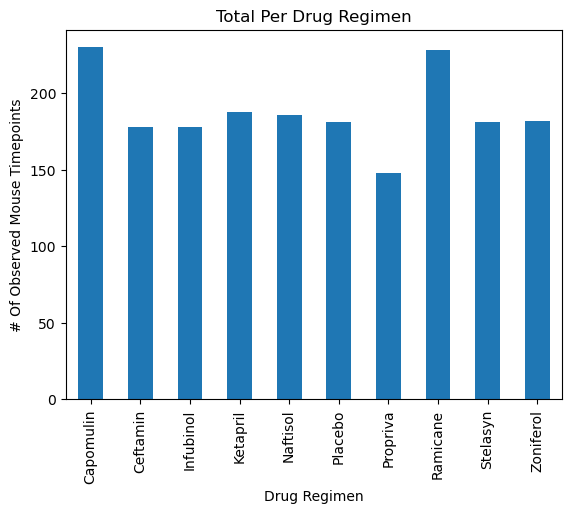

In [173]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Counts rows of observed timepoints per Drug Regiman  
tumorCount = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Timepoint"].count()

#Uses the grouped data to create bar chart
tumorCount.plot(kind="bar", title="Total Per Drug Regimen", ylabel= "# Of Observed Mouse Timepoints", xlabel="Drug Regimen")

plt.show()

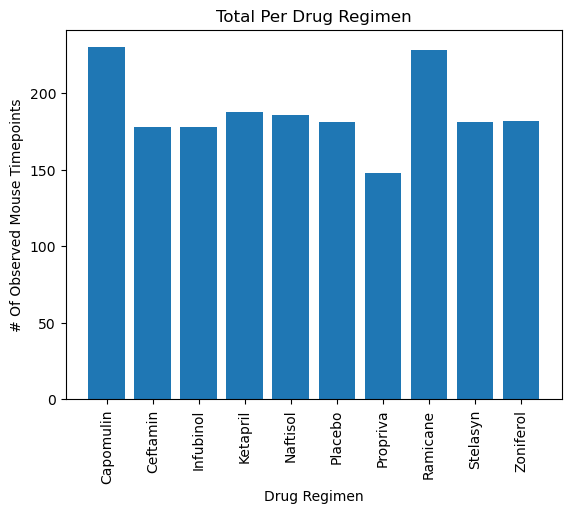

In [175]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#plt.bar - refrence the name of drug regimans 
# use indexes of original DF 
#x label = drug regiman 
#y label = time points 
#rotate tick labels

x_axis = tumorCount.index
y_axis = tumorCount.values
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, align="center")
plt.title("Total Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")

plt.xticks(tick_locations,x_axis,rotation="vertical")
plt.show()


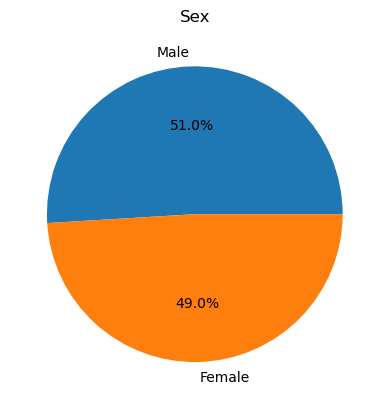

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# autopercent using wildcarding 
#kind=pie 

genderPop =  clean_combined_mouse_data_df["Sex"].value_counts()

x = genderPop.plot(kind="pie",autopct="%1.1f%%", title="Sex");

#removes the count label 
x.set_ylabel('');


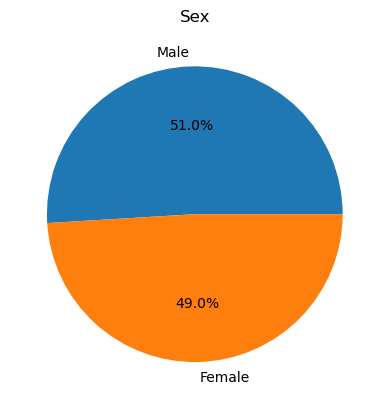

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie
labels = ["Male", "Female"]


plt.pie(genderPop, labels=labels,autopct="%1.1f%%")
plt.title("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [181]:
clean_combined_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [183]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#filteredDrugs = clean_combined_mouse_data_df['Drug Regimen'].loc[clean_combined_mouse_data_df['Drug Regimen'].isin(drugs)]

#tumorVolume = clean_combined_mouse_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sum()
#print(tumorVolume)

# Start by getting the last (greatest) timepoint for each mouse 
#The timepoint the drug worked/mouse survived till
maxTime = clean_combined_mouse_data_df.groupby(["Mouse ID"])["Timepoint"].max()
#print(maxTime)

#converts series into DF by resetting index
#Mouse ID + Greatest Timepoint
maxTime_df = maxTime.reset_index()
maxTime.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(maxTime_df,clean_combined_mouse_data_df, on=["Mouse ID", "Timepoint"], how='left')
max_timepoint_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [185]:
# Put treatments into a list for for loop (and later for plot labels)

#Creates a list for the specified drugs to focus on
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolume = []

#Loops through each drug in drugList and filters rows so that drug regiman = specified drugs from above 
#After filtering, will get the tumor volume data for the current drug
for drug in drugList:
    finalVolume = new_timepoint_df.loc[new_timepoint_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]

    #Adds each series to the empty tumor volume list 
    #Creates a list for each drug -- will be used to make the box plots 
    tumorVolume.append(finalVolume)


    # Calculate the IQR and quantitatively determine if there are any potential outliers
    #Wherever IQR = . 
    quartiles = finalVolume.quantile([0.25,0.5,0.75]) #calculates these percentiles for final Volume ans stores in quartiles
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75 ]
    iqr = upper_quartile - lower_quartile #Measures spread of the middle 50% of the data 
    lower_bound = lower_quartile - (1.5*iqr) #Any value below this a utlier
    upper_bound = upper_quartile + (1.5*iqr) #Any value above this a outlier

    #Filters for any values outside the lower bound and upper bound - identifies outliers
    outlier = finalVolume.loc[(finalVolume < lower_bound) | (finalVolume > upper_bound)  ]

    
    if len(outlier) == 0:
        print(f"{drug}'s potential outliers :None") #If no outliers print none
    else:
        output = f"{drug}'s potential outliers: " #print outlier if exists 
        for x in outlier: 
            output += f"{x} " 
        print(output)
    


Capomulin's potential outliers :None
Ramicane's potential outliers :None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers :None


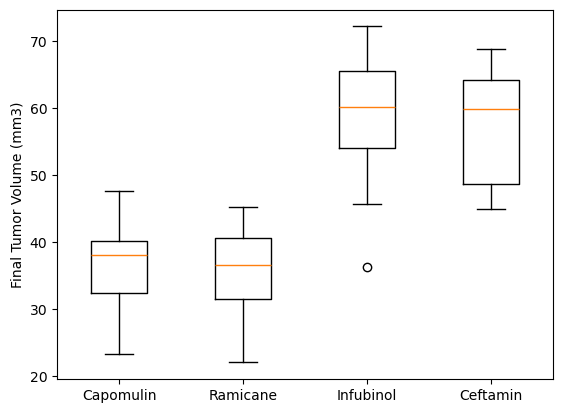

In [187]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(tumorVolume, tick_labels=drugList); #uses tumorVolume series to create box plot
plt.show()

## Line and Scatter Plots

In [189]:
clean_combined_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


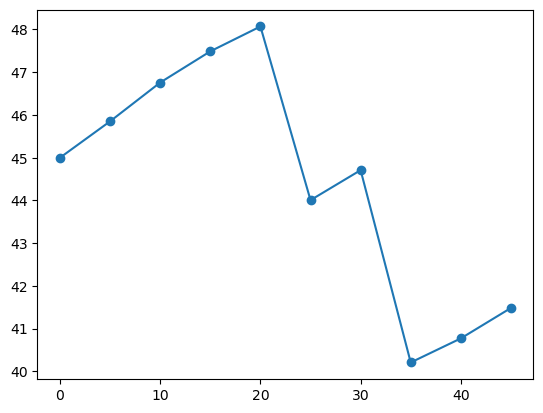

In [191]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment = tumorVolume[0] #Grabs capomulin
mouse_study = clean_combined_mouse_data_df.loc[clean_combined_mouse_data_df["Mouse ID"] == "l509"] 

plt.plot(mouse_study["Timepoint"], mouse_study["Tumor Volume (mm3)"], marker="o")
plt.show()

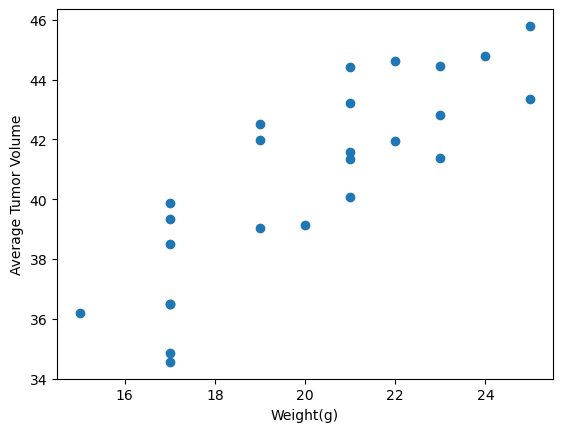

In [217]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_combined_mouse_data_df.loc[clean_combined_mouse_data_df["Drug Regimen"] == "Capomulin"] 
capomulin_treatment_df = pd.DataFrame(capomulin)
#capomulin_treatment_df.head() 

capomulin_avg_df = capomulin_treatment_df.groupby("Mouse ID").mean(numeric_only=True)
#capomulin_avg_df.head()

#Creates scatter plot
plt.scatter(
    capomulin_avg_df["Weight (g)"],
    capomulin_avg_df["Tumor Volume (mm3)"],

);

plt.xlabel("Weight(g)");
plt.ylabel("Average Tumor Volume");


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


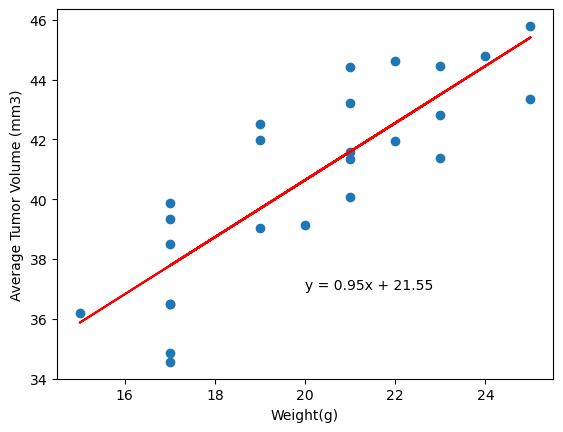

In [239]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_avg_df["Weight (g)"],capomulin_avg_df["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

x_axis = capomulin_avg_df["Weight (g)"]
y_axis = capomulin_avg_df["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

regressValues = slope * x_axis + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressValues, "r-")
plt.annotate(lineEQ, (20,37))

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()